In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [37]:
# 周方向

N = 2000
theta = np.linspace(0, 2.0 * math.pi, 2000)
radius = 40.0 * np.ones(N)

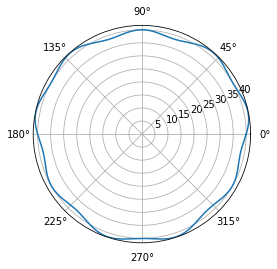

In [42]:
# 長周期 (40~120度)
long_period_roundness = np.sin(3 * theta) + np.sin(9 * theta)

ax = plt.subplot(projection='polar')
ax.plot(theta, radius + long_period_roundness)

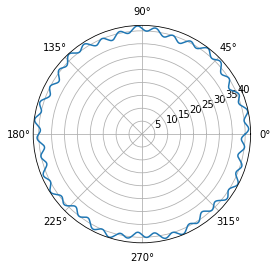

In [159]:
# 中周期 (10~40度)
medium_period_roundness = np.sin(9 * theta) + np.sin(36 * theta)

ax = plt.subplot(projection='polar')
ax.plot(theta, radius + medium_period_roundness)

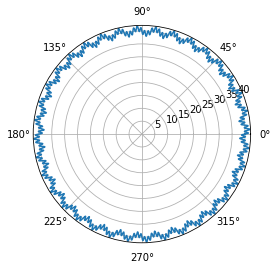

In [160]:
# 短周期 (1~10度)
medium_period_roundness = np.sin(36 * theta) + np.sin(180 * theta)

ax = plt.subplot(projection='polar')
ax.plot(theta, radius + medium_period_roundness)

In [145]:
# 長手方向

N = 5000
f1 = 0.0
ML = 200.0e-3
WD = 1900.0e-3

seam = f1 - WD - 0.5 * ML

entrance_radius = 30.5e-3
seam_radius = 30e-3
exit_radius = 28.5e-3

#z = np.linspace(-0.5 * ML, 0.5 * ML, N)
z = np.linspace(-1.9 - ML, -1.9, N)

mirror_profile = np.zeros(N)
mirror_profile[z < seam] = entrance_radius - (z[z < seam] - (f1 - WD - ML)) * (entrance_radius - seam_radius) / (0.5 * ML)
mirror_profile[z >= seam] = seam_radius - (z[z >= seam] - seam) * (seam_radius - exit_radius) / (0.5 * ML)

0.9999999599839988
0.0001333600053349528


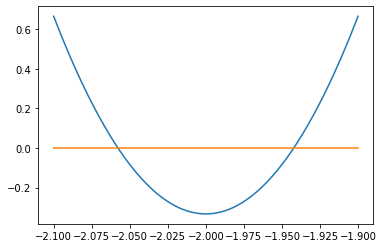

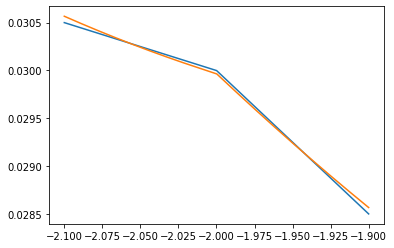

In [146]:
# axis deflection

#y = (z**2 - ML**2 / 12) / (ML**2 / 4)
y = 4 * ((z + WD) / ML + 0.5)**2 - 1.0 / 3.0

plt.plot(z, y)
plt.plot(z, np.zeros(N))

print(np.max(y) - np.min(y))
print(np.mean(y))

plt.figure()

plt.plot(z, mirror_profile)
plt.plot(z, mirror_profile + 1.0e-4 * y)

0.20000000000000018
-5.684341886080802e-18


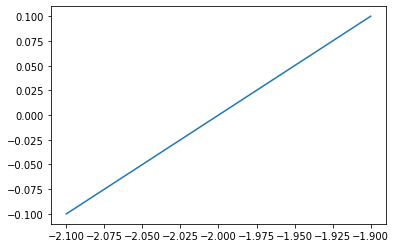

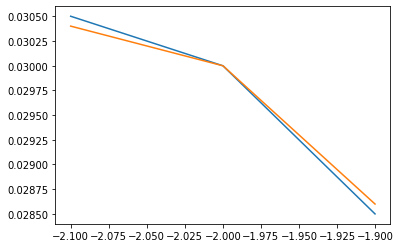

In [158]:
# taper error

y = (z - seam)

plt.plot(z, y)

print(np.max(y) - np.min(y))
print(np.mean(y))

plt.figure()

plt.plot(z, mirror_profile)
plt.plot(z, mirror_profile + 1.0e-3 * y)